In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [278]:
df = pd.read_csv('/content/AviationData.csv', encoding='latin1', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [279]:
# Calculate percentage of missing values per column
missing_percent = df.isna().mean() * 100
print("Percentage of missing values per column:\n", missing_percent[missing_percent > 0])

Percentage of missing values per column:
 Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5.053494
Broad.phase.of.flight     30.560587
Report.Status              7.181991
Publication.Date      

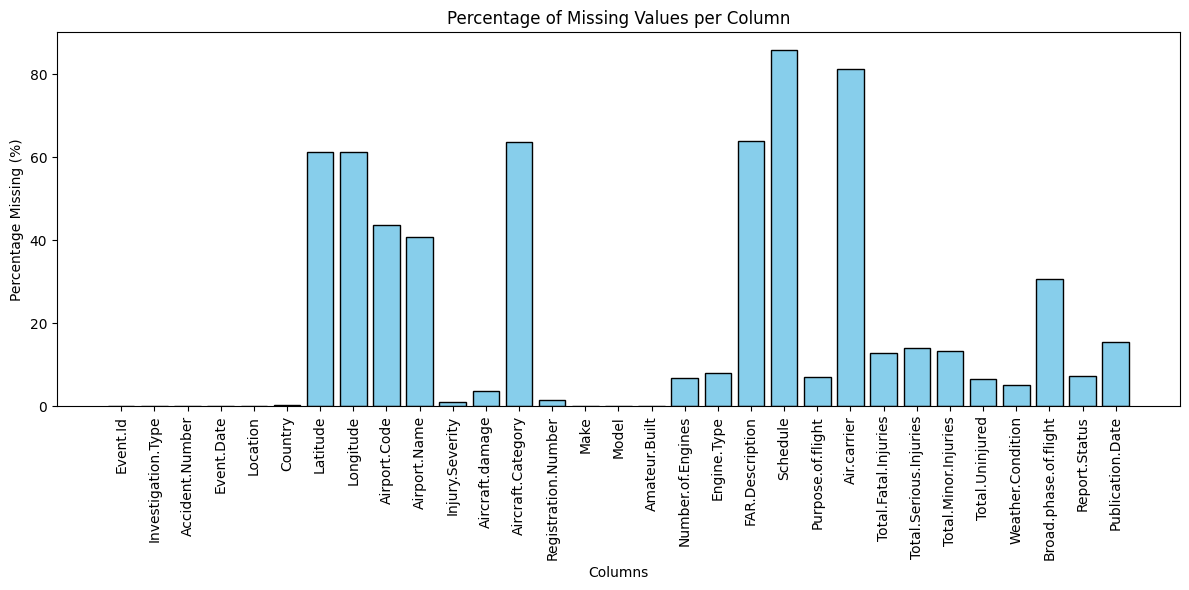

In [280]:
# Plot missing values
plt.figure(figsize=(12, 6))
plt.bar(missing_percent.index, missing_percent.values, color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.title('Percentage of Missing Values per Column')
plt.tight_layout()
plt.show()

In [281]:
# Remove records with missing Make or Model
df = df.dropna(subset=['Make', 'Model'], how='any')

# Impute missing values
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0)
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(0)
df['Weather.Condition'] = df['Weather.Condition'].fillna('UNK')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')
df['Report.Status'] = df['Report.Status'].fillna('Unknown')

# Standardize text fields
df['Make'] = df['Make'].str.lower().str.strip()
df['Model'] = df['Model'].str.lower().str.strip()
df['Weather.Condition'] = df['Weather.Condition'].str.upper().str.strip()
df['Report.Status'] = df['Report.Status'].str.lower().str.strip()



# Create combined Make_Model column
df['Make_Model'] = df['Make'] + ' ' + df['Model']


# Extract year from Event.Date
df['Event.Year'] = pd.to_datetime(df['Event.Date']).dt.year

# Filter for relevant aircraft makes
relevant_makes = ['boeing', 'airbus', 'cessna', 'piper']
df = df[df['Make'].isin(relevant_makes)]

# Verify cleaning
print('Cleaned dataset shape:', df.shape)

/tmp/ipython-input-281-3179987439.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
/tmp/ipython-input-281-3179987439.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0)
/tmp/ipython-input-281-3179987439.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

Cleaned dataset shape: (45043, 33)


In [282]:
# handling remaining missing values
#Air.Carrier 81% missing values(drop them)
df = df.drop(columns=['Air.carrier'])

In [283]:
# Location column 61% missing values(drop them)
df = df.drop(columns=['Latitude', 'Longitude'])

In [284]:
#impute with none or private to show no airport involvement
df['Airport.Code'] = df['Airport.Code'].fillna('NONE')
df['Airport.Name'] = df['Airport.Name'].fillna('Private')

In [285]:
# Impute based on Total.Fatal.Injuries
df['Injury.Severity'] = df.apply(
    lambda x: 'Fatal' if x['Total.Fatal.Injuries'] > 0 else 'Non-Fatal'
    if pd.isna(x['Injury.Severity']) else x['Injury.Severity'], axis=1)

In [286]:
# impute with mode
df['Aircraft.damage'] = df['Aircraft.damage'].fillna(df['Aircraft.damage'].mode()[0])

In [287]:
# drop rows
df = df.dropna(subset=[ 'Amateur.Built'])

In [288]:
# fill missing values with unknown
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Unknown')

/tmp/ipython-input-288-1559272984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Unknown')


In [289]:
print("Remaining Missing Values:\n", df.isna().sum())

Remaining Missing Values:
 Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     22
Country                      76
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         30221
Registration.Number         608
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          2470
Engine.Type                3084
FAR.Description           30337
Schedule                  39634
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date           7823
Make_Model                    0
Event.Year                    0
dtype: int64


In [290]:
# impute with 'non-scheduled' Indicating the flight was not scheduled
df['Schedule'] = df['Schedule'].fillna('Non-Scheduled')

/tmp/ipython-input-290-126643970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Schedule'] = df['Schedule'].fillna('Non-Scheduled')


In [291]:
# impute with 'part 91'
df['FAR.Description'] = df['FAR.Description'].fillna('Part 91')

In [292]:
# impute with 'airplane'
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('Airplane')

In [293]:
# impute with median
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'])
df['Publication.Date'] = df['Publication.Date'].fillna(df['Publication.Date'].median())

/tmp/ipython-input-293-3399942368.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Publication.Date'] = pd.to_datetime(df['Publication.Date'])


In [294]:
# Impute based on Number.of.Engines
df['Engine.Type'] = df.apply(
    lambda x: 'None' if x['Number.of.Engines'] == 0 else df['Engine.Type'].mode()[0]
    if pd.isna(x['Engine.Type']) else x['Engine.Type'], axis=1)

In [295]:
# Impute with mode
df['Report.Status'] = df['Report.Status'].fillna(df['Report.Status'].mode()[0])

In [296]:
#  Impute with mode
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode()[0])

In [297]:
# drop rows
df = df.dropna(subset=['Registration.Number'])

In [298]:
# drop rows
df = df.dropna(subset=['Location'])

In [299]:
# drop rows
df = df.dropna(subset=['Country'])

In [300]:
# impute with 'airplane'
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('Airplane')

In [301]:
print("Remaining Missing Values:\n", df.isna().sum())

Remaining Missing Values:
 Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
Make_Model                0
Event.Year                0
dtype: int64


In [302]:
df['Year'] = pd.to_datetime(df['Event.Date']).dt.year

In [303]:
df.shape

(44288, 31)

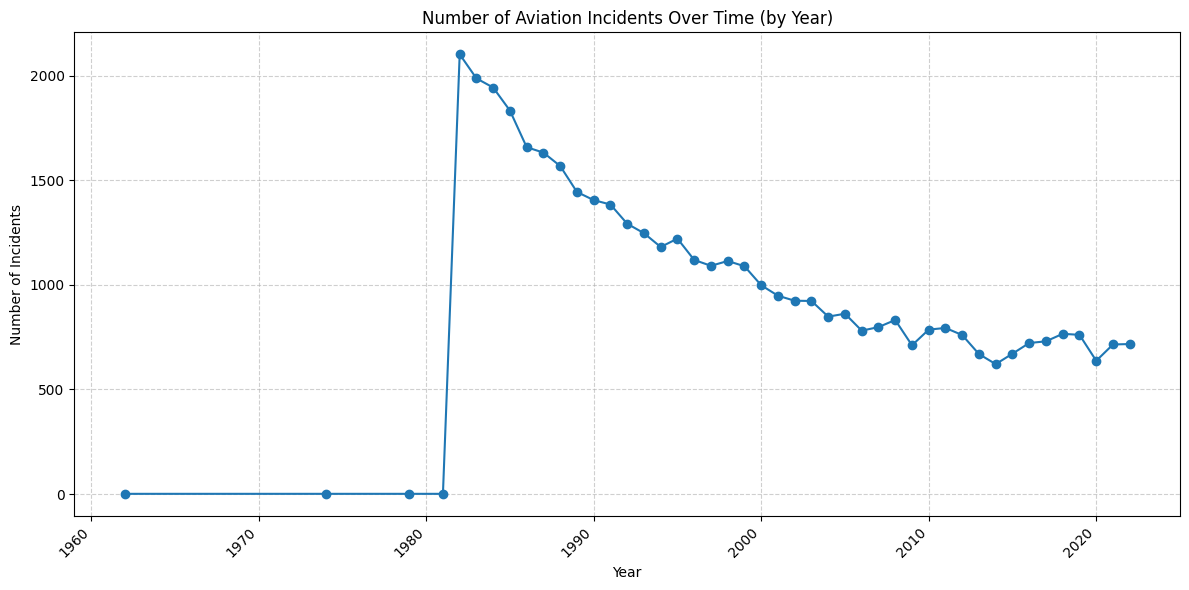

In [304]:
# a plot showing number of aviation incidents over time(by year)
import matplotlib.pyplot as plt
import pandas as pd


# Calculate yearly incident counts
yearly_accidents = df['Year'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(12, 6)) # Set the figure size for better readability
plt.plot(yearly_accidents.index, yearly_accidents.values, marker='o') # Plot the line with markers
plt.title('Number of Aviation Incidents Over Time (by Year)') # Set the plot title
plt.xlabel('Year') # Set the x-axis label
plt.ylabel('Number of Incidents') # Set the y-axis label
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for easier reading
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better fit
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('temporal_trends_mpl.png') # Save the plot to a file
plt.show()

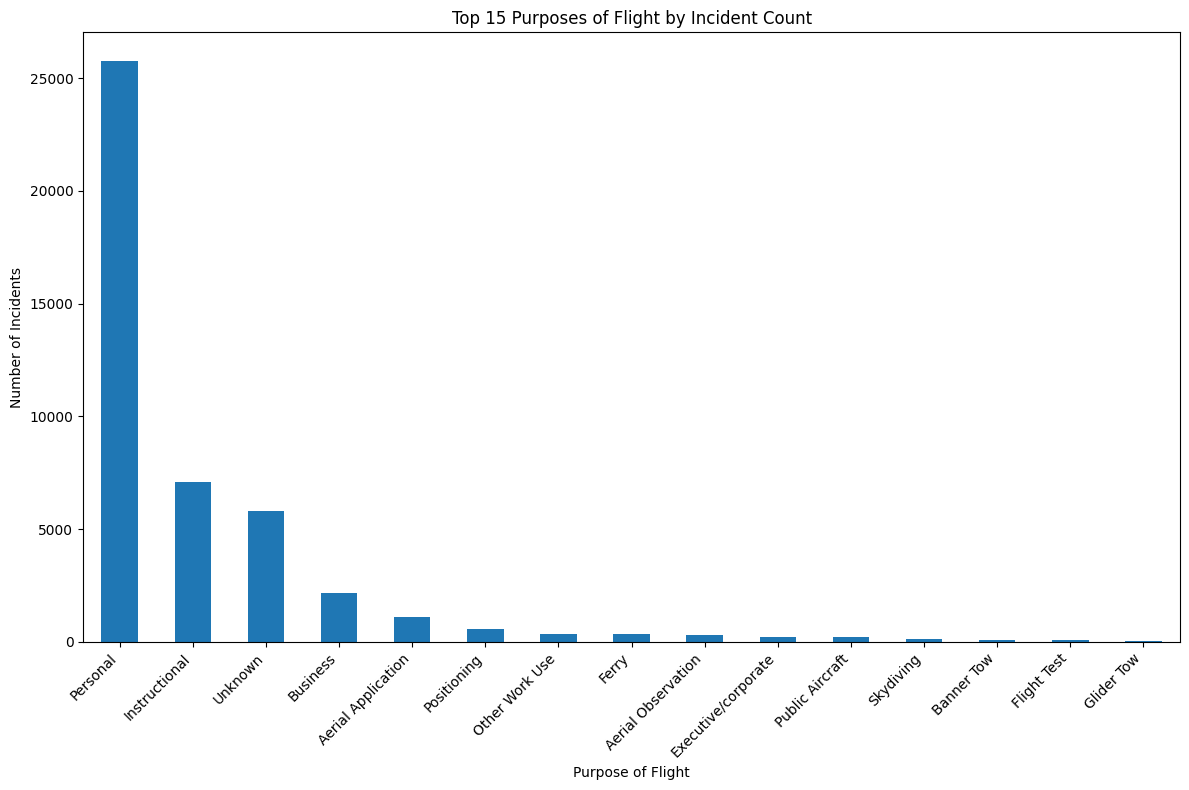

In [308]:
#  plot showing top 15 purposes of flight by incident count

import matplotlib.pyplot as plt
# plot showing top 15 purposes of flight by incident count
purpose_counts = df['Purpose.of.flight'].value_counts().head(15)

plt.figure(figsize=(12, 8))
purpose_counts.plot(kind='bar')
plt.title('Top 15 Purposes of Flight by Incident Count')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('incidents_by_purpose_of_flight')
plt.show()

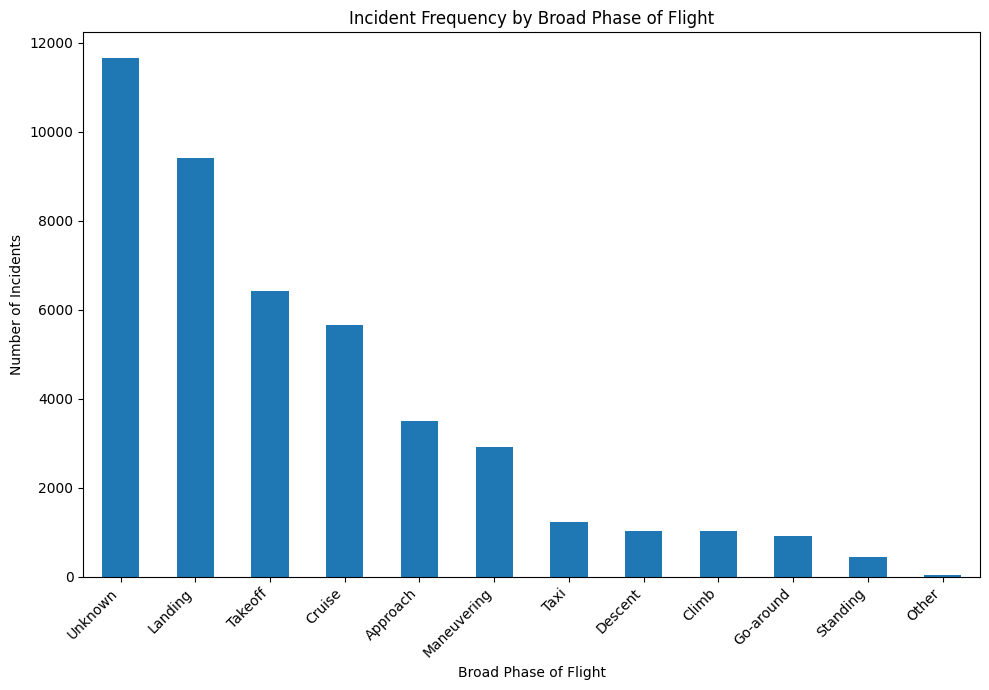

In [309]:
#  plot  showing incident frequency by broad phase of light

import matplotlib.pyplot as plt
# plot showing incident frequency by broad phase of light

# Calculate incident frequency by broad phase of light
phase_counts = df['Broad.phase.of.flight'].value_counts()

plt.figure(figsize=(10, 7))
phase_counts.plot(kind='bar')
plt.title('Incident Frequency by Broad Phase of Flight')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('incidents_by_broad_phase_light')
plt.show()

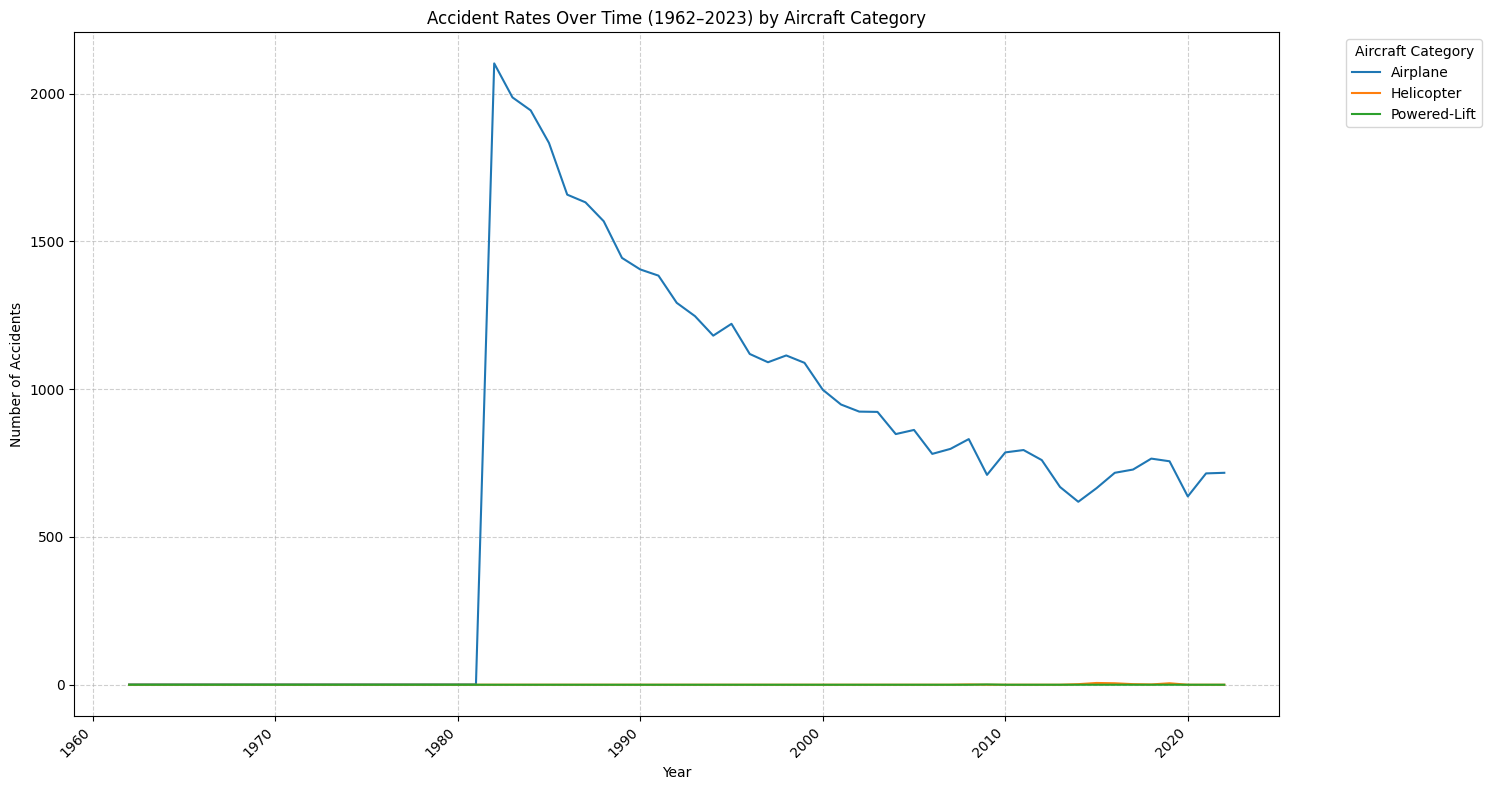

In [310]:
#  plot showing Accident rates over time (1962–2023) by Aircraft.Category

import pandas as pd
import matplotlib.pyplot as plt
# Ensure Event.Date is in datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract the year from the date
df['Year'] = df['Event.Date'].dt.year

# Group by Year and Aircraft.Category and count incidents
accidents_over_time_by_category = df.groupby(['Year', 'Aircraft.Category']).size().unstack(fill_value=0)

# Filter years between 1962 and 2023 (inclusive)
accidents_over_time_by_category = accidents_over_time_by_category.loc[1962:2023]

# Plotting
plt.figure(figsize=(15, 8)) # Adjust figure size as needed

# Plot each category as a separate line
for category in accidents_over_time_by_category.columns:
    plt.plot(accidents_over_time_by_category.index, accidents_over_time_by_category[category], label=category)

plt.title('Accident Rates Over Time (1962–2023) by Aircraft Category')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Aircraft Category', bbox_to_anchor=(1.05, 1), loc='upper left') # Add legend outside the plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping and accommodate legend
plt.savefig('accidents_by_aircraft_category_over_time')
plt.show()

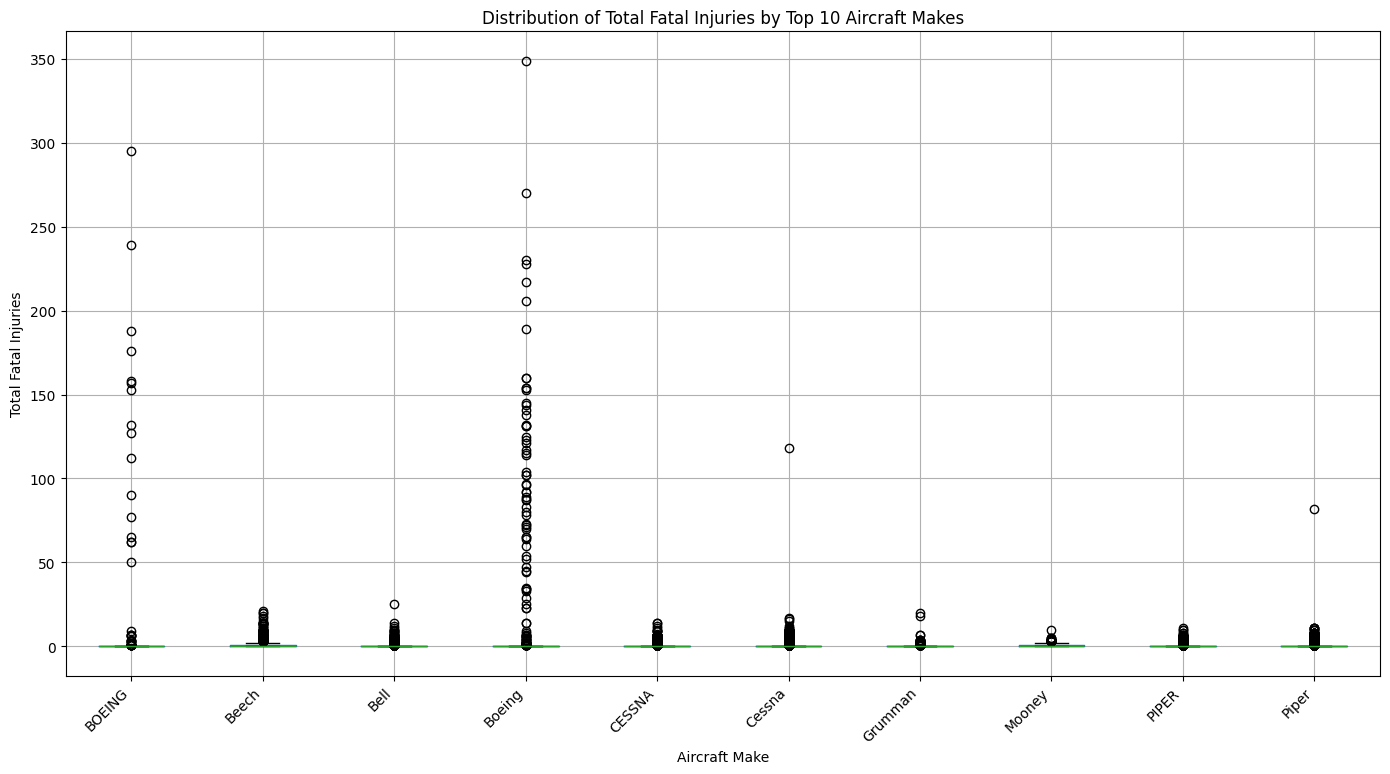

In [311]:
#  plot showing Box Plot: Distribution of Total.Fatal.Injuries by top Make  with matplotlib

import pandas as pd
import matplotlib.pyplot as plt
# Plot showing Box Plot: Distribution of Total.Fatal.Injuries by top Make

# Recalculate top Makes after dropping 'Make' earlier
# We need to re-load or re-process the data if Make column was dropped.
# Assuming the original df (before dropping 'Make') is available or re-loaded
df_original = pd.read_csv('/content/AviationData.csv', encoding='latin1', low_memory=False)

# Drop columns that were identified as having high missing values or are not needed for this plot
df_filtered = df_original.drop(columns=['Air.carrier', 'Latitude', 'Longitude'])

# Impute missing 'Total.Fatal.Injuries' with 0 for this analysis
df_filtered['Total.Fatal.Injuries'] = df_filtered['Total.Fatal.Injuries'].fillna(0)

# Identify top Makes based on incident count
top_makes = df_filtered['Make'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top Makes
df_top_makes = df_filtered[df_filtered['Make'].isin(top_makes)].copy()

# Ensure 'Total.Fatal.Injuries' is numeric, coercing errors to NaN and then filling with 0
df_top_makes['Total.Fatal.Injuries'] = pd.to_numeric(df_top_makes['Total.Fatal.Injuries'], errors='coerce').fillna(0)

# Create the box plot
plt.figure(figsize=(14, 8))
df_top_makes.boxplot(column='Total.Fatal.Injuries', by='Make', ax=plt.gca())
plt.title('Distribution of Total Fatal Injuries by Top 10 Aircraft Makes')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatal Injuries')
plt.suptitle('') # Suppress the default boxplot title
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('fatal_injuries_by_aircraft_makes')
plt.show()

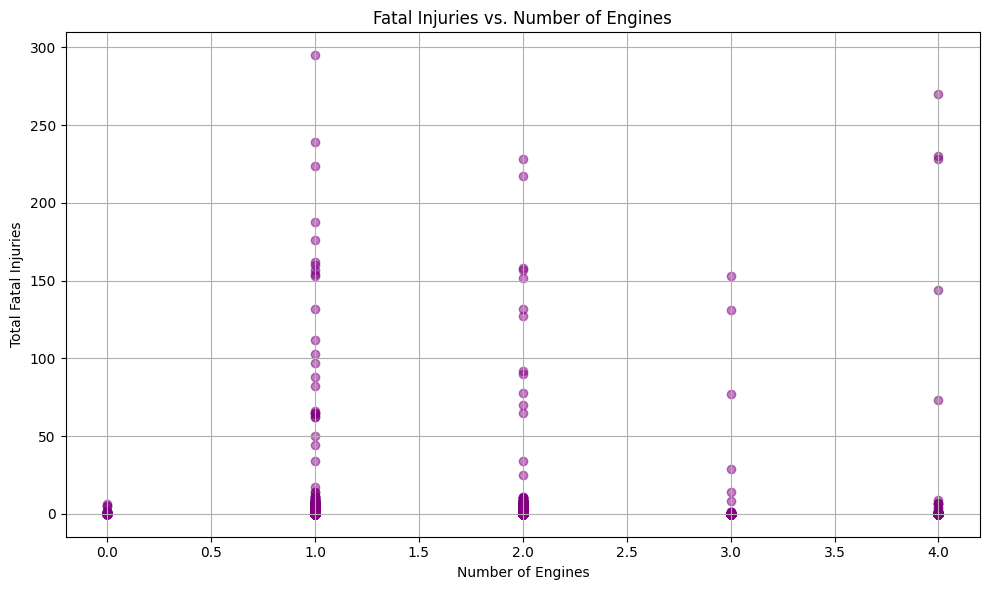

In [313]:
#  Scatter Plot: Total Fatal Injuries vs. Number of Engines
plt.figure(figsize=(10, 6))
plt.scatter(df['Number.of.Engines'], df['Total.Fatal.Injuries'], alpha=0.5, color='purple')
plt.xlabel('Number of Engines')
plt.ylabel('Total Fatal Injuries')
plt.title('Fatal Injuries vs. Number of Engines')
plt.grid(True)
plt.tight_layout()
plt.savefig('fatalities_vs_engines_scatter.png')
plt.show()

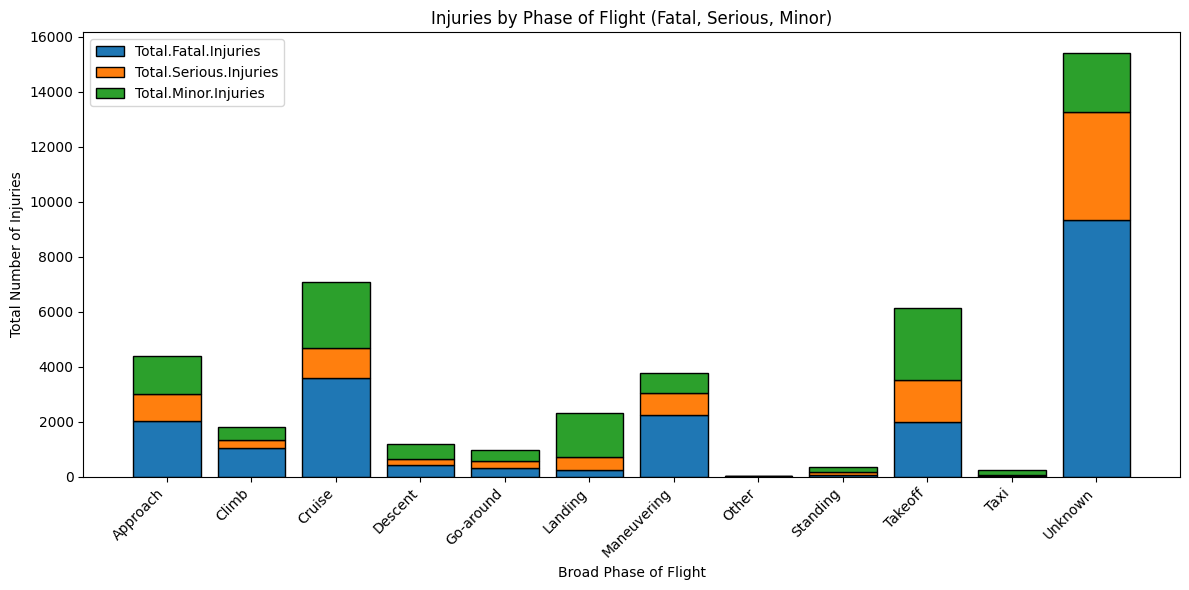

In [314]:
#  Stacked Bar Graph: Injuries by Broad Phase of Flight
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']
phase_injuries = df.groupby('Broad.phase.of.flight')[injury_cols].sum()
plt.figure(figsize=(12, 6))
bottom = None
for col in injury_cols:
    plt.bar(phase_injuries.index, phase_injuries[col], bottom=bottom, label=col, edgecolor='black')
    bottom = phase_injuries[col] if bottom is None else bottom + phase_injuries[col]
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Total Number of Injuries')
plt.title('Injuries by Phase of Flight (Fatal, Serious, Minor)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('injuries_by_phase_stacked_bar.png')
plt.show()

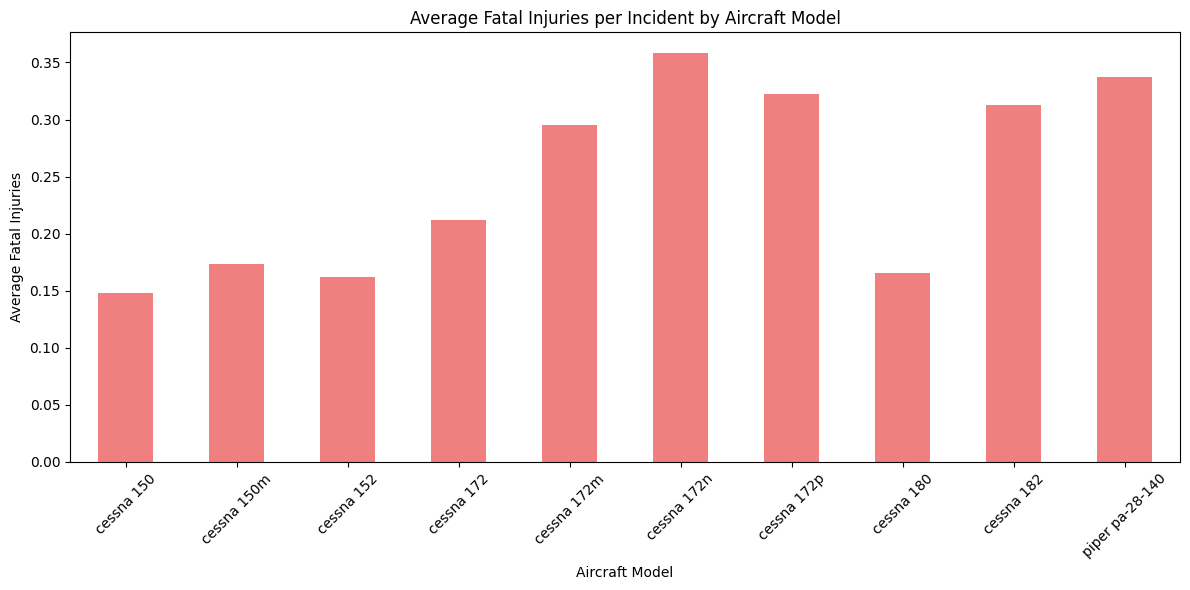

In [321]:
#  Fatal Injury Rate by Aircraft Model
top_models = df['Make_Model'].value_counts().head(10).index
fatal_rates = df[df['Make_Model'].isin(top_models)].groupby('Make_Model')['Total.Fatal.Injuries'].mean()
plt.figure(figsize=(12, 6))
fatal_rates.plot(kind='bar', color='lightcoral')
plt.title('Average Fatal Injuries per Incident by Aircraft Model')
plt.xlabel('Aircraft Model')
plt.ylabel('Average Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('fatal_injury_by_model.png')
plt.show();

<Figure size 1000x600 with 0 Axes>

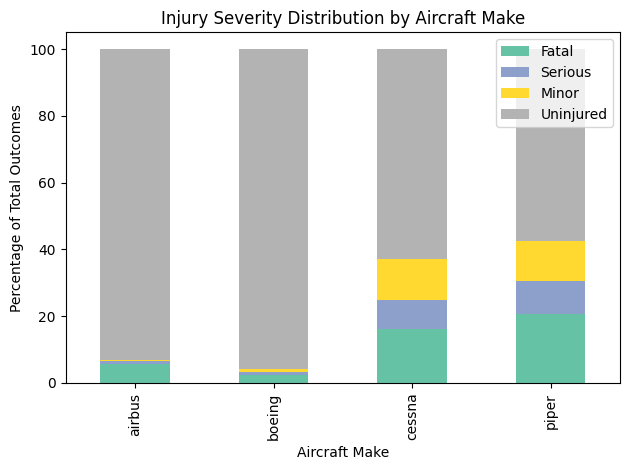

In [322]:
#  Injury Severity Distribution by Aircraft Make
injury_types = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
injury_data = df.groupby('Make')[injury_types].sum()
injury_data = injury_data.div(injury_data.sum(axis=1), axis=0) * 100  # Normalize to percentages
plt.figure(figsize=(10, 6))
injury_data.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Injury Severity Distribution by Aircraft Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Percentage of Total Outcomes')
plt.legend(['Fatal', 'Serious', 'Minor', 'Uninjured'], loc='upper right')
plt.tight_layout()
plt.savefig('injury_severity_distribution.png')
plt.show();


In [323]:
df.shape

(44288, 31)